### import important library

In [1]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date as dt
import pandas_ta as ta
import matplotlib.pyplot as plt
import mibian as mb
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [ ]:
sns.set_style("ticks")

In [ ]:
# code to get raw data file from local drive uncomment it if your are reading data from your computer

# os.chdir('F:\\wqu capstone project\\NSE Equity & Options Data-2015-2020') #defining working directory
# print(os.getcwd())

# Code to initialize your google drive comment it if your are getting data from your computer's local drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5pgazgDnQswxZjdb-oIht0kKnPJCVoqXj1t6pMMBxq5Zx7SnpzcNU
Mounted at /content/drive


### Input - Option Data  2015-2020

In [ ]:
# read data into dataframe from computer's local drive 
# input_data = pd.read_csv("E:\\CAPSTONE\\final_option_input_data.csv")
# #                         names=["contract","date","type","strike_price","expiry","open","high","low","close","oi","month_type"])
# del input_data['Unnamed: 0']

# read data into dataframe from google drive
input_data = pd.read_csv('/content/drive/My Drive/WQU Capstone/final_project/final_option_input_data.csv')
del input_data['Unnamed: 0']

In [ ]:
# contract data available
input_data['contract'].unique()

array(['ACC', 'AMBUJACEM', 'ASIANPAINT', 'AXISBANK', 'BANKBARODA',
       'BHARTIARTL', 'BHEL', 'BPCL', 'CAIRN', 'CIPLA', 'COALINDIA', 'DLF',
       'DRREDDY', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'IDFC',
       'INDUSINDBK', 'INFY', 'ITC', 'JINDALSTEL', 'JPASSOCIAT',
       'KOTAKBANK', 'LT', 'LUPIN', 'M&M', 'MARUTI', 'NMDC', 'NTPC',
       'ONGC', 'PNB', 'POWERGRID', 'RANBAXY', 'RELIANCE', 'SBIN', 'SSLT',
       'SUNPHARMA', 'TATAMOTORS', 'TATAPOWER', 'TATASTEEL', 'TCS',
       'ULTRACEMCO', 'WIPRO', 'NIFTY', 'BANKNIFTY'], dtype=object)

### Change and Select contract

In [ ]:
# selecting contract for filter the option data
select_contract = "BANKNIFTY"  
input_data=input_data[input_data['contract']== select_contract]

In [ ]:
input_data = input_data.dropna()  # droping na value from the dataframe 

input_data["date"] = input_data["date"].astype('int') 
input_data["expiry"] = input_data["expiry"].astype('int')

input_data['join_col'] = input_data['contract']+input_data['date'].astype('str')
# input_data.head()
input_data.tail()

,contract,date,type,strike_price,expiry,open,high,low,close,oi,month_type,join_col
5228641,BANKNIFTY,20201231,PE,33900.0,20201231,0.0,0.00,0.00,2574.00,175.0,Near,BANKNIFTY20201231
5228642,BANKNIFTY,20201231,PE,34000.0,20201231,2714.7,2789.75,2712.85,2789.75,450.0,Near,BANKNIFTY20201231
5228643,BANKNIFTY,20201231,PE,34100.0,20201231,0.0,0.00,0.00,2771.90,0.0,Near,BANKNIFTY20201231
5228644,BANKNIFTY,20201231,PE,34200.0,20201231,0.0,0.00,0.00,2871.60,0.0,Near,BANKNIFTY20201231
5228645,BANKNIFTY,20201231,PE,34300.0,20201231,0.0,0.00,0.00,2971.40,0.0,Near,BANKNIFTY20201231


In [ ]:
input_data["strike_price"] = input_data["strike_price"].astype('float')

### Input Spot_data 2015-2020

In [ ]:
### reading spot data from csv
eq_input_data = pd.read_csv('/content/drive/My Drive/WQU Capstone/final_project/nse_equity_data_unadjusted_2015-2020.csv') 

### calcuating ATR

In [ ]:
# calcuating ATR by using pandas_ta 
eq_input_data['ATR'] = ta.atr(eq_input_data['high'],eq_input_data['low'],eq_input_data['close'],timeperiod=14)

In [ ]:
eq_input_data['join_col'] = eq_input_data['ticker']+eq_input_data['date'].astype('str')

### merge both option and spot data

In [ ]:
input_result = pd.merge(input_data, eq_input_data, how="left", on="join_col")

In [ ]:
input_result.tail(5)

,contract,date_x,type,strike_price,expiry,open_x,high_x,low_x,close_x,oi,month_type,join_col,ticker,date_y,open_y,high_y,low_y,close_y,volume,ATR
209969,BANKNIFTY,20201231,PE,33900.0,20201231,0.0,0.00,0.00,2574.00,175.0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
209970,BANKNIFTY,20201231,PE,34000.0,20201231,2714.7,2789.75,2712.85,2789.75,450.0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
209971,BANKNIFTY,20201231,PE,34100.0,20201231,0.0,0.00,0.00,2771.90,0.0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
209972,BANKNIFTY,20201231,PE,34200.0,20201231,0.0,0.00,0.00,2871.60,0.0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
209973,BANKNIFTY,20201231,PE,34300.0,20201231,0.0,0.00,0.00,2971.40,0.0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615


In [ ]:
input_result = input_result[['contract','date_x','type','strike_price','expiry','open_x','high_x','low_x','close_x','oi','close_y','ATR']]

In [ ]:
input_result = input_result.rename(columns={'date_x': 'date', 'open_x':'open','high_x':'high','low_x':'low','close_x':'close','close_y':'spot_price'})

In [ ]:
input_result['spot_price'].describe()

count    208958.000000
mean      23394.362471
std        4869.923092
min       13555.700000
25%       19020.200000
50%       23307.200000
75%       27376.100000
max       32443.800000
Name: spot_price, dtype: float64

In [ ]:
# select_contract = "NIFTY"
input_result=input_result[input_result['contract']== select_contract]

In [ ]:
input_result

,contract,date,type,strike_price,expiry,open,high,low,close,oi,spot_price,ATR
0,BANKNIFTY,20150101,CE,15200.0,20150129,3640.0,3640.00,3640.00,3640.00,21550.0,18750.4,1339.713442
1,BANKNIFTY,20150101,CE,15300.0,20150129,3385.0,3385.00,3385.00,3385.00,2250.0,18750.4,1339.713442
2,BANKNIFTY,20150101,CE,15400.0,20150129,0.0,0.00,0.00,1875.55,0.0,18750.4,1339.713442
3,BANKNIFTY,20150101,CE,15500.0,20150129,0.0,0.00,0.00,3200.00,9275.0,18750.4,1339.713442
4,BANKNIFTY,20150101,CE,15600.0,20150129,0.0,0.00,0.00,1721.50,0.0,18750.4,1339.713442
...,...,...,...,...,...,...,...,...,...,...,...,...
209969,BANKNIFTY,20201231,PE,33900.0,20201231,0.0,0.00,0.00,2574.00,175.0,31264.1,572.309615
209970,BANKNIFTY,20201231,PE,34000.0,20201231,2714.7,2789.75,2712.85,2789.75,450.0,31264.1,572.309615
209971,BANKNIFTY,20201231,PE,34100.0,20201231,0.0,0.00,0.00,2771.90,0.0,31264.1,572.309615
209972,BANKNIFTY,20201231,PE,34200.0,20201231,0.0,0.00,0.00,2871.60,0.0,31264.1,572.309615


### Make Pivot data

In [ ]:
# pivot table for option data as per strike price
pivot_data = pd.pivot_table(input_result, values='close', index=['date','expiry','type','contract','spot_price','ATR'],
                    columns=['strike_price'], aggfunc=np.sum)
pivot_data

strike_price                                             12000.0  ...  35400.0
date     expiry   type contract  spot_price ATR                   ...         
20150101 20150129 CE   BANKNIFTY 18750.4    1339.713442      NaN  ...      NaN
                  PE   BANKNIFTY 18750.4    1339.713442      NaN  ...      NaN
20150102 20150129 CE   BANKNIFTY 19057.8    1270.333910      NaN  ...      NaN
                  PE   BANKNIFTY 19057.8    1270.333910      NaN  ...      NaN
20150105 20150129 CE   BANKNIFTY 19017.4    1192.331488      NaN  ...      NaN
...                                                          ...  ...      ...
20201229 20201231 PE   BANKNIFTY 31322.5    598.426536       NaN  ...      NaN
20201230 20201231 CE   BANKNIFTY 31303.1    591.610355       NaN  ...      NaN
                  PE   BANKNIFTY 31303.1    591.610355       NaN  ...      NaN
20201231 20201231 CE   BANKNIFTY 31264.1    572.309615       NaN  ...      NaN
                  PE   BANKNIFTY 31264.1    572.309615       NaN  ...      NaN

[2954 rows x 235 columns]

In [ ]:
# saving data in csv format 
pivot_data.to_csv("stock_pivot.csv")

In [ ]:
# reading option pivot data from csv
table = pd.read_csv("stock_pivot.csv")

In [ ]:
table.head(5)

,date,expiry,type,contract,spot_price,ATR,12000.0,12100.0,12200.0,12300.0,12400.0,12500.0,12600.0,12700.0,12800.0,12900.0,13000.0,13100.0,13200.0,13300.0,13400.0,13500.0,13600.0,13700.0,13800.0,13900.0,14000.0,14100.0,14200.0,14300.0,14400.0,14500.0,14600.0,14700.0,14800.0,14900.0,15000.0,15100.0,15200.0,15300.0,...,31500.0,31600.0,31700.0,31800.0,31900.0,32000.0,32100.0,32200.0,32300.0,32400.0,32500.0,32600.0,32700.0,32800.0,32900.0,33000.0,33100.0,33200.0,33300.0,33400.0,33500.0,33600.0,33700.0,33800.0,33900.0,34000.0,34100.0,34200.0,34300.0,34400.0,34500.0,34600.0,34700.0,34800.0,34900.0,35000.0,35100.0,35200.0,35300.0,35400.0
0,20150101,20150129,CE,BANKNIFTY,18750.4,1339.713442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3640.00,3385.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20150101,20150129,PE,BANKNIFTY,18750.4,1339.713442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20150102,20150129,CE,BANKNIFTY,19057.8,1270.333910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949.05,3510.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20150102,20150129,PE,BANKNIFTY,19057.8,1270.333910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20150105,20150129,CE,BANKNIFTY,19017.4,1192.331488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3910.00,3765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
table['ATM_Strike'] = round(table['spot_price']/100)*100  # find out ATM_strike 
table['date']= pd.to_datetime(table['date'].astype('str'))
table['expiry']= pd.to_datetime(table['expiry'].astype('str'))

In [ ]:
stock=table
stock.drop(['contract'],axis=1,inplace=True)
stock.columns=stock.columns.astype('str')

In [ ]:
stock['month_year'] = pd.to_datetime(stock['date']).dt.to_period('M') # defining month_year columns in dataframe 
stock['day'] = pd.to_datetime(stock['date']).dt.strftime('%d')

In [ ]:
stock[['expiry','month_year']]

,expiry,month_year
0,2015-01-29,2015-01
1,2015-01-29,2015-01
2,2015-01-29,2015-01
3,2015-01-29,2015-01
4,2015-01-29,2015-01
...,...,...
2949,2020-12-31,2020-12
2950,2020-12-31,2020-12
2951,2020-12-31,2020-12
2952,2020-12-31,2020-12


In [ ]:
stock['rank'] = stock['expiry'].rank(ascending = 1) # arraging expiry in ascending order

In [ ]:
Table1 = stock.groupby('month_year').first() # making month_year groupby

In [ ]:
Table1['month_year'] = pd.to_datetime(Table1['date']).dt.to_period('M')

In [ ]:
# defind Table3 for storing CE option price and Table5 for storing PE option prices
Table3 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "month_year":0, "day": ["0"],"ATR":0})
Table5 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "month_year":0, "day": ["0"],"ATR":0})

In [ ]:
CE_OTM_Strike = []
PE_OTM_Strike = []
month_year = []

In [ ]:
for x in range (0,71):
    e=Table1.month_year[x]
    d=Table1.expiry[x]
    a= float((Table1.ATM_Strike[x]))

    b = round((a +a*0.05)/100)*100 #for out of money strike price of CE
    c = round((a -a*0.05)/100)*100 # for out of money strike price of PE 
#     b = round(a + 100)
#     c = round(a - 100)


    f1 = str(float(a))#ATM
    f2 = str(float(b))#OTM
    f3 = str(float(c))#OTM
    print(f" {x}, {e} ATM {a} CE_OTM {b}  PE_OTM {c}")

    
    CE_OTM_Strike.append(b)
    PE_OTM_Strike.append(c)
    month_year.append(e)
    
    Table2 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "month_year": stock["month_year"], "day": stock["day"],
                           "ATR":stock["ATR"], "CE_OTM": stock[f2]})
    
    Table12 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "month_year": stock["month_year"], "day": stock["day"],
                            "ATR":stock["ATR"], "PE_OTM": stock[f3]})

    
    Table6= Table2.where((Table2.month_year == e) & (Table2.expiry == d) & (Table2.type == 'CE'))
    Table4= Table12.where((Table12.month_year == e) & (Table12.expiry == d) & (Table12.type == 'PE'))
    
    Table6 = Table6.dropna()
    Table4 = Table4.dropna()

    Table4['day_to_expiry'] = (Table4['expiry']-Table4["date"]).dt.days
    
    Table6.set_index("date", inplace = True)
    Table4.set_index("date", inplace = True)

    Table4['CE_OTM'] = Table6['CE_OTM']
    Table4['strangle']= -(Table6['CE_OTM']+Table4['PE_OTM']) # stangle price -ve for initially selling OTM call and put option
    Table4['P&L']=Table4['strangle'].diff()# calcuating  profit and loss
    
    Table3 = Table3.append(Table4)
    Table7 = Table4.groupby('day').last()
    Table5 = Table5.append(Table7)


Table5.drop(Table5.index[0], inplace=True)
Table5['Total_P&L']=Table5['P&L'].cumsum() # calcuating total profit & loss
trade = Table5

 0, 2015-01 ATM 18800.0 CE_OTM 19700  PE_OTM 17900
 1, 2015-02 ATM 19400.0 CE_OTM 20400  PE_OTM 18400
 2, 2015-03 ATM 20000.0 CE_OTM 21000  PE_OTM 19000
 3, 2015-04 ATM 18600.0 CE_OTM 19500  PE_OTM 17700
 4, 2015-05 ATM 18500.0 CE_OTM 19400  PE_OTM 17600
 5, 2015-06 ATM 18600.0 CE_OTM 19500  PE_OTM 17700
 6, 2015-07 ATM 18600.0 CE_OTM 19500  PE_OTM 17700
 7, 2015-08 ATM 18900.0 CE_OTM 19800  PE_OTM 18000
 8, 2015-09 ATM 16500.0 CE_OTM 17300  PE_OTM 15700
 9, 2015-10 ATM 17200.0 CE_OTM 18100  PE_OTM 16300
 10, 2015-11 ATM 17300.0 CE_OTM 18200  PE_OTM 16400
 11, 2015-12 ATM 17200.0 CE_OTM 18100  PE_OTM 16300
 12, 2016-01 ATM 17000.0 CE_OTM 17800  PE_OTM 16200
 13, 2016-02 ATM 15300.0 CE_OTM 16100  PE_OTM 14500
 14, 2016-03 ATM 14400.0 CE_OTM 15100  PE_OTM 13700
 15, 2016-04 ATM 16200.0 CE_OTM 17000  PE_OTM 15400
 16, 2016-05 ATM 16500.0 CE_OTM 17300  PE_OTM 15700
 17, 2016-06 ATM 17400.0 CE_OTM 18300  PE_OTM 16500
 18, 2016-07 ATM 18000.0 CE_OTM 18900  PE_OTM 17100
 19, 2016-08 ATM 18700

In [ ]:

# making columns for storing strike of OTM call and OTM put option
column_names = ["date", "spot_price", "expiry","type","month_year","day","ATR",
                "day_to_expiry","CE_OTM","PE_OTM","strangle","P&L","Total_P&L"]

trade = trade.reindex(columns=column_names)

lists = [month_year,CE_OTM_Strike,PE_OTM_Strike]
df = pd.concat([pd.Series(x) for x in lists],axis=1)

df.columns = ('month_year','CE_OTM_Strike','PE_OTM_Strike')

trade['month_year'] = (trade['month_year'].astype('str'))

df['month_year'] = (df['month_year'].astype('str'))

trade_sheet = pd.merge(trade,df,how='left',on='month_year')

## theta

In [ ]:
# loop for call theta value calcuation

trade_sheet['call_theta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['call_theta'].iloc[i]= (mb.BS([trade_sheet.spot_price[i],trade_sheet.CE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility =20).callTheta)
    except:
        trade_sheet['call_theta'].iloc[i] = np.nan

In [ ]:
## loop for put theta value calcuation 
trade_sheet['put_theta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['put_theta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.PE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).putTheta)
    except:
        trade_sheet['put_theta'].iloc[i] = np.nan

## Find Delta

In [ ]:
# calcuating call delta
trade_sheet['call_delta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['call_delta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.CE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).callDelta)
    except:
        trade_sheet['call_delta'].iloc[i] = np.nan

In [ ]:
## calcuating put delta
trade_sheet['put_delta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['put_delta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.PE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).putDelta)
    except:
        trade_sheet['put_delta'].iloc[i] = np.nan

#### Calculate the Max drawdown in the past window days for each day

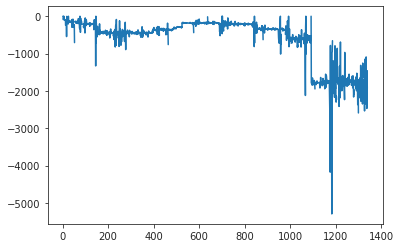

In [ ]:
trade_sheet['rolling_max']= trade_sheet['P&L'].rolling(250,min_periods=1).max()
trade_sheet['daily_drawdown'] = trade_sheet['P&L']-trade_sheet['rolling_max']
trade_sheet['daily_drawdown'].plot()

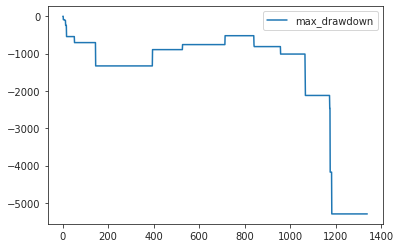

In [ ]:
# calcuating max drawdown 
trade_sheet['max_drawdown']= trade_sheet['daily_drawdown'].rolling(250,min_periods=1).min()
trade_sheet['max_drawdown'].plot(label='max_drawdown')
plt.legend(loc='best') 

## heatmap without sl

In [ ]:
df = trade_sheet.groupby('month_year').sum()
df.index = pd.to_datetime(df.index)
df['month'] = [i.month for i in df.index]
df['year'] = [i.year for i in df.index]

In [ ]:
results = df.groupby(['year','month'])
Return = pd.DataFrame(results['P&L'].apply(lambda row:row.iloc[0]).reset_index())
Return_df = Return.pivot(index='year',columns='month',values ='P&L')

Return_df.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
Return_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-609.30,345.05,-865.05,239.75,256.25,285.00,260.55,-604.90,603.45,345.75,252.55,184.35
2016,-656.75,-716.15,-745.40,273.05,210.10,211.50,-6.30,188.45,104.25,185.20,-70.65,277.15
2017,-390.75,108.80,145.70,74.15,67.50,77.90,-398.50,86.20,159.00,88.10,258.00,121.65
2018,-781.85,-736.40,200.65,208.75,111.10,147.15,101.80,96.20,-1293.10,269.50,-97.50,215.70
2019,126.15,154.85,-1866.65,265.90,421.10,140.45,-601.50,258.05,-1532.95,728.15,1849.05,180.75
2020,129.45,310.85,-7409.00,199.15,2174.70,565.25,1114.20,-598.10,-1367.20,-243.30,-2347.95,NaN


In [ ]:
# define color for heatmap
def color_positive_green(val):
    if val > 0:
        color = 'mediumspringgreen'#'#01B8AA'#'green
    else:
        color = 'lightcoral'#'#FD625E'#'red'
    return 'background-color:%s'%color

In [ ]:
heatmap = Return_df.style.applymap(color_positive_green).set_precision(2)

In [ ]:
heatmap

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-609.30,345.05,-865.05,239.75,256.25,285.00,260.55,-604.90,603.45,345.75,252.55,184.35
2016,-656.75,-716.15,-745.40,273.05,210.10,211.50,-6.30,188.45,104.25,185.20,-70.65,277.15
2017,-390.75,108.80,145.70,74.15,67.50,77.90,-398.50,86.20,159.00,88.10,258.00,121.65
2018,-781.85,-736.40,200.65,208.75,111.10,147.15,101.80,96.20,-1293.10,269.50,-97.50,215.70
2019,126.15,154.85,-1866.65,265.90,421.10,140.45,-601.50,258.05,-1532.95,728.15,1849.05,180.75
2020,129.45,310.85,-7409.00,199.15,2174.70,565.25,1114.20,-598.10,-1367.20,-243.30,-2347.95,nan


## tradesheet with stop loss

In [ ]:
# loops for stop loss calcuation

df_with_sl = pd.DataFrame(columns = [ 'date', 'spot_price', 'expiry', 'type', 'month_year',
       'day', 'ATR', 'PE_OTM', 'day_to_expiry', 'CE_OTM', 'strangle', 'P&L',
       'Total_P&L', 'CE_OTM_Strike', 'PE_OTM_Strike', 'call_theta',
       'put_theta', 'call_delta', 'put_delta', 'new_strangle',
       'exit_condition', 'cum_pnl', 'exit_flag', 'rank'])

# define stop loss factor 
stoploss_ptg = 50 

for month_year in trade_sheet['month_year'].unique():
    df_new = pd.DataFrame()
    df_new = trade_sheet[trade_sheet['month_year'] == month_year]

    df_new['new_strangle'] = df_new['strangle'].iloc[0]
    df_new['exit_condition']= round((df_new['new_strangle']*stoploss_ptg)/100,2) 
    df_new['cum_pnl'] = df_new['P&L'].cumsum()
    df_new['exit_flag'] = np.where(df_new['cum_pnl'].abs() > df_new['exit_condition'].abs(),1,0)
   
    df_new['rank']= df_new.groupby(['exit_flag'])['exit_flag'].rank(method = 'first')

    df_new.drop(df_new[(df_new['exit_flag']==True) & (df_new['rank'] > 1.0)].index, inplace = True)

#     del df_new['Unnamed: 0']
    df_with_sl = pd.concat([df_with_sl,df_new])


In [ ]:
df_with_sl.tail(3)

,date,spot_price,expiry,type,month_year,day,ATR,PE_OTM,day_to_expiry,CE_OTM,...,call_delta,put_delta,new_strangle,exit_condition,cum_pnl,exit_flag,rank,rolling_max,daily_drawdown,max_drawdown
1324,NaN,26313.1,2020-11-26 00:00:00,PE,2020-11,NaN,681.980502,115.45,21.0,876.40,...,0.576948,-0.013733,-1095.25,-547.62,103.40,0,4.0,1789.45,-1798.55,-5294.3
1325,NaN,26798.9,2020-11-26 00:00:00,PE,2020-11,NaN,684.560466,85.20,20.0,1158.55,...,0.721882,-0.004038,-1095.25,-547.62,-148.50,0,5.0,1789.45,-2041.35,-5294.3
1326,NaN,27534.1,2020-11-26 00:00:00,PE,2020-11,NaN,692.527575,51.85,17.0,1679.05,...,0.896415,-0.000236,-1095.25,-547.62,-635.65,1,1.0,1789.45,-2276.60,-5294.3


In [ ]:
# heatmap for return with stop loss 

with_sl = df_with_sl.groupby('month_year').sum()
with_sl.index =  pd.to_datetime(with_sl.index)

with_sl['month'] = [i.month for i in with_sl.index]
with_sl['year'] = [i.year for i in with_sl.index]

results_with_sl = with_sl.groupby(['year','month'])
Return_SL = pd.DataFrame(results_with_sl['P&L'].apply(lambda row:row.iloc[0]).reset_index())
Return_df_SL = Return_SL.pivot(index='year',columns='month',values ='P&L')

Return_df_SL.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [ ]:
Return_df_SL

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-130.05,196.75,-176.60,120.75,425.60,293.50,85.70,-9.10,281.60,211.95,130.95,-19.85
2016,-94.45,170.20,-220.95,149.90,136.35,78.25,138.00,103.75,43.95,88.20,-67.15,159.75
2017,-37.20,65.20,83.55,42.80,39.80,40.65,-53.95,95.25,91.35,27.70,258.00,46.95
2018,-23.90,-136.45,-71.25,123.55,40.70,87.30,50.35,54.90,-66.30,171.60,-190.40,149.75
2019,66.45,97.35,-257.90,135.45,400.75,140.45,-7.15,-69.00,243.90,420.00,1789.45,120.60
2020,18.10,387.75,-848.60,-11.95,340.45,561.50,577.95,-281.05,-495.10,-133.85,-635.65,NaN


In [ ]:
#define color for heatmap
def color_positive_green(val):
    if val > 0:
        color = 'mediumspringgreen'#'#01B8AA'#'green
    else:
        color = 'lightcoral'#'#FD625E'#'red'
    return 'background-color:%s'%color

In [ ]:
heatmap_with_sl = Return_df_SL.style.applymap(color_positive_green).set_precision(2)

In [ ]:
heatmap_with_sl #heatmap with sl

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-130.05,196.75,-176.60,120.75,425.60,293.50,85.70,-9.10,281.60,211.95,130.95,-19.85
2016,-94.45,170.20,-220.95,149.90,136.35,78.25,138.00,103.75,43.95,88.20,-67.15,159.75
2017,-37.20,65.20,83.55,42.80,39.80,40.65,-53.95,95.25,91.35,27.70,258.00,46.95
2018,-23.90,-136.45,-71.25,123.55,40.70,87.30,50.35,54.90,-66.30,171.60,-190.40,149.75
2019,66.45,97.35,-257.90,135.45,400.75,140.45,-7.15,-69.00,243.90,420.00,1789.45,120.60
2020,18.10,387.75,-848.60,-11.95,340.45,561.50,577.95,-281.05,-495.10,-133.85,-635.65,nan


In [ ]:
del df_with_sl['rolling_max']
del df_with_sl['daily_drawdown']
del df_with_sl['max_drawdown']

## With Stop loss Calculate the Max drawdown in the past window days for each day

In [ ]:
# calcuating drawdown 
df_with_sl['rolling_max']= df_with_sl['P&L'].rolling(250,min_periods=1).max()
df_with_sl['daily_drawdown'] = df_with_sl['P&L']-trade_sheet['rolling_max']

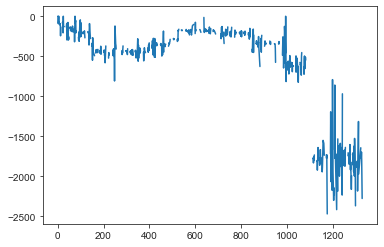

In [ ]:
df_with_sl['daily_drawdown'].plot()

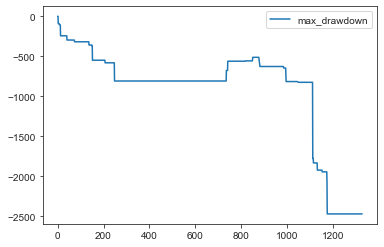

In [ ]:
# calcuating max drawdown 
df_with_sl['max_drawdown']= df_with_sl['daily_drawdown'].rolling(250,min_periods=1).min()
df_with_sl['max_drawdown'].plot(label='max_drawdown')
plt.legend(loc='best')

In [ ]:
df_with_sl['Total_P&L']=df_with_sl['P&L'].cumsum() # calcuating total profit and loss with stop loss

In [ ]:
df_with_sl.index = df_with_sl.expiry

In [ ]:
# df_with_sl['max_daily_drawdown'].plot(kind='area',label='max_daily_drawdown')
# # df_with_sl['P&L'].plot(kind='area',label='P&L')
# plt.legend(loc='best')

### Trade Analysis

## with Stop loss reports

In [ ]:
trades_sl = df_with_sl.groupby('month_year').sum()

reports_sl = []



total_trades = len(trades_sl)
total_profit_loss =df_with_sl['Total_P&L'][-1]
largest_Profit=round(trades_sl['P&L'].max())
largest_loss = round(trades_sl['P&L'].min())
Average_Profit_Loss = round(trades_sl['P&L'].mean())
profit_trades = len(trades_sl[trades_sl['P&L'] > 0])
loss_trades = len(trades_sl[trades_sl['P&L'] < 0])
trades_sl['loss_count'] = np.where(trades_sl['P&L'] < 0, 1, 0)
trades_sl['lc'] = (trades_sl['loss_count'].diff(1) != 0).cumsum()
max_con_loss = trades_sl[trades_sl['loss_count'] == 1].groupby('lc').size().max()
max_con_profit = trades_sl[trades_sl['loss_count'] == 0].groupby('lc').size().max()




reports_sl.append(dict(title='Total Trades', value=total_trades))
reports_sl.append(dict(title='Total Profit & Loss', value=total_profit_loss))
reports_sl.append(dict(title='Largest Profit', value=largest_Profit))
reports_sl.append(dict(title='Largest Loss', value=largest_loss))
reports_sl.append(dict(title='Average Profit & Loss', value=Average_Profit_Loss))
reports_sl.append(dict(title='Profitable Trades', value=profit_trades))
reports_sl.append(dict(title='Losing Trades', value=loss_trades))
reports_sl.append(dict(title='Max Con. Loss', value=max_con_loss))
reports_sl.append(dict(title='Max Con. Profit', value=max_con_profit))


In [ ]:
import pprint
pprint.pprint(reports_sl)

[{'title': 'Total Trades', 'value': 71},
 {'title': 'Total Profit & Loss', 'value': 5546.850000000008},
 {'title': 'Largest Profit', 'value': 1789},
 {'title': 'Largest Loss', 'value': -849},
 {'title': 'Average Profit & Loss', 'value': 78},
 {'title': 'Profitable Trades', 'value': 48},
 {'title': 'Losing Trades', 'value': 23},
 {'title': 'Max Con. Loss', 'value': 4},
 {'title': 'Max Con. Profit', 'value': 7}]


In [ ]:
report_sl = pd.DataFrame(reports_sl)

In [ ]:
report_sl # report with stop loss

,title,value
0,Total Trades,71.00
1,Total Profit & Loss,5546.85
2,Largest Profit,1789.00
3,Largest Loss,-849.00
4,Average Profit & Loss,78.00
5,Profitable Trades,48.00
6,Losing Trades,23.00
7,Max Con. Loss,4.00
8,Max Con. Profit,7.00


## without Stop loss reports

In [ ]:
# making tradesheet reports without stop loss 

trades_without_sl = trade_sheet.groupby('month_year').sum()

reports_without_sl = []



total_trades = len(trades_without_sl)
total_profit_loss =trade_sheet['Total_P&L'].iat[-1]
largest_Profit=round(trades_without_sl['P&L'].max())
largest_loss = round(trades_without_sl['P&L'].min())
Average_Profit_Loss = round(trades_without_sl['P&L'].mean())
profit_trades = len(trades_without_sl[trades_without_sl['P&L'] > 0])
loss_trades = len(trades_without_sl[trades_without_sl['P&L'] < 0])
trades_without_sl['loss_count'] = np.where(trades_without_sl['P&L'] < 0, 1, 0)
trades_without_sl['lc'] = (trades_without_sl['loss_count'].diff(1) != 0).cumsum()
max_con_loss = trades_without_sl[trades_without_sl['loss_count'] == 1].groupby('lc').size().max()
max_con_profit = trades_without_sl[trades_without_sl['loss_count'] == 0].groupby('lc').size().max()



  

reports_without_sl.append(dict(title='Total Trades', value=total_trades))
reports_without_sl.append(dict(title='Total Profit & Loss', value=total_profit_loss))
reports_without_sl.append(dict(title='Largest Profit', value=largest_Profit))
reports_without_sl.append(dict(title='Largest Loss', value=largest_loss))
reports_without_sl.append(dict(title='Average Profit & Loss', value=Average_Profit_Loss))
reports_without_sl.append(dict(title='Profitable Trades', value=profit_trades))
reports_without_sl.append(dict(title='Losing Trades', value=loss_trades))
reports_without_sl.append(dict(title='Max Con. Loss', value=max_con_loss))
reports_without_sl.append(dict(title='Max Con. Profit', value=max_con_profit))

In [ ]:
reports_without_sl

[{'title': 'Total Trades', 'value': 71},
 {'title': 'Total Profit & Loss', 'value': -8560.949999999992},
 {'title': 'Largest Profit', 'value': 2175},
 {'title': 'Largest Loss', 'value': -7409},
 {'title': 'Average Profit & Loss', 'value': -121},
 {'title': 'Profitable Trades', 'value': 49},
 {'title': 'Losing Trades', 'value': 22},
 {'title': 'Max Con. Loss', 'value': 4},
 {'title': 'Max Con. Profit', 'value': 6}]

In [ ]:
report_without_sl_df = pd.DataFrame(reports_without_sl)

In [ ]:
report_without_sl_df # reports without stop loss

,title,value
0,Total Trades,71.00
1,Total Profit & Loss,-8560.95
2,Largest Profit,2175.00
3,Largest Loss,-7409.00
4,Average Profit & Loss,-121.00
5,Profitable Trades,49.00
6,Losing Trades,22.00
7,Max Con. Loss,4.00
8,Max Con. Profit,6.00


## `Report selection`

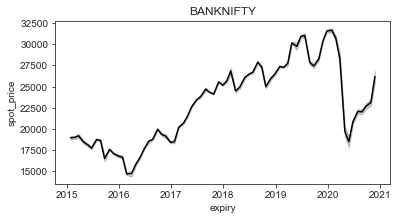

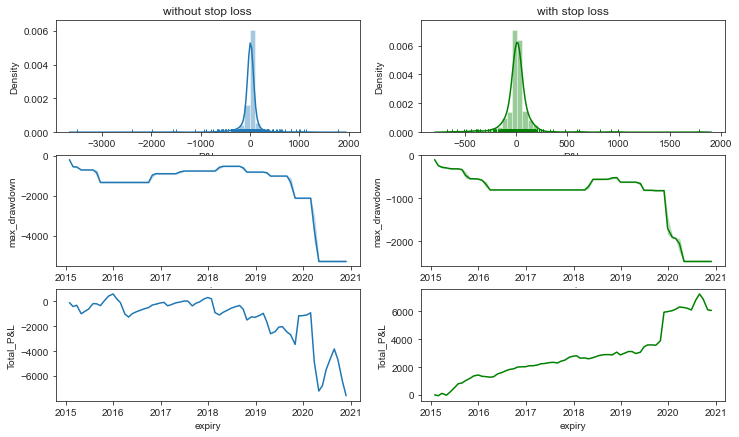

In [ ]:
fig_dims = (6,3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df_with_sl, y='spot_price',x='expiry',color='k', ax=ax) # spot value chart 
plt.title(select_contract)

fig, axes = plt.subplots(3, 2, figsize=(12,7))
sns.distplot(trade_sheet['P&L'],rug=True,ax=axes[0,0]) # profit and loss  histrogram without stop loss 
axes[0,0].set_title('without stop loss')

sns.distplot(df_with_sl['P&L'],color ='g',rug=True,ax=axes[0,1]) # profit and loss histrogram with stop loss
axes[0,1].set_title('with stop loss')

sns.lineplot(data=trade_sheet,y='max_drawdown',x='expiry',ax=axes[1,0]) # max drawdown chart without stop loss
# axes[1,0].set_title('without stop loss')

sns.lineplot(data=df_with_sl,x='expiry',y='max_drawdown',color='g',ax=axes[1,1]) # max drawdown chart with stop loss
# axes[1,1].set_title('with stop loss')

sns.lineplot(data=trade_sheet, y='Total_P&L',x= 'expiry',ax=axes[2,0]) # profit and loss chart without stop loss

sns.lineplot(data=df_with_sl, y='Total_P&L',x='expiry',color ='g',ax=axes[2,1]) # profit and loss chart with stop loss


In [ ]:
report_without_sl_df # without stop loss

,title,value
0,Total Trades,71.00
1,Total Profit & Loss,-8560.95
2,Largest Profit,2175.00
3,Largest Loss,-7409.00
4,Average Profit & Loss,-121.00
5,Profitable Trades,49.00
6,Losing Trades,22.00
7,Max Con. Loss,4.00
8,Max Con. Profit,6.00


In [ ]:
report_sl # with stop loss

,title,value
0,Total Trades,71.00
1,Total Profit & Loss,5546.85
2,Largest Profit,1789.00
3,Largest Loss,-849.00
4,Average Profit & Loss,78.00
5,Profitable Trades,48.00
6,Losing Trades,23.00
7,Max Con. Loss,4.00
8,Max Con. Profit,7.00


In [ ]:
heatmap # without stop loss

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-609.30,345.05,-865.05,239.75,256.25,285.00,260.55,-604.90,603.45,345.75,252.55,184.35
2016,-656.75,-716.15,-745.40,273.05,210.10,211.50,-6.30,188.45,104.25,185.20,-70.65,277.15
2017,-390.75,108.80,145.70,74.15,67.50,77.90,-398.50,86.20,159.00,88.10,258.00,121.65
2018,-781.85,-736.40,200.65,208.75,111.10,147.15,101.80,96.20,-1293.10,269.50,-97.50,215.70
2019,126.15,154.85,-1866.65,265.90,421.10,140.45,-601.50,258.05,-1532.95,728.15,1849.05,180.75
2020,129.45,310.85,-7409.00,199.15,2174.70,565.25,1114.20,-598.10,-1367.20,-243.30,-2347.95,nan


In [ ]:
heatmap_with_sl # with sl

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,-130.05,196.75,-176.60,120.75,425.60,293.50,85.70,-9.10,281.60,211.95,130.95,-19.85
2016,-94.45,170.20,-220.95,149.90,136.35,78.25,138.00,103.75,43.95,88.20,-67.15,159.75
2017,-37.20,65.20,83.55,42.80,39.80,40.65,-53.95,95.25,91.35,27.70,258.00,46.95
2018,-23.90,-136.45,-71.25,123.55,40.70,87.30,50.35,54.90,-66.30,171.60,-190.40,149.75
2019,66.45,97.35,-257.90,135.45,400.75,140.45,-7.15,-69.00,243.90,420.00,1789.45,120.60
2020,18.10,387.75,-848.60,-11.95,340.45,561.50,577.95,-281.05,-495.10,-133.85,-635.65,nan
